## E-commerce Exploratory Data Analysis
_______________________

## Import libraries
___________________

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math 
import random
import sys
import pickle
from sklearn import datasets


## Load Data
____________

In [3]:
eco = pd.read_csv('ecommerce.csv')

In [4]:
eco.head()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,AU-2015-1,11/9/15,11/17/15,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,6/30/15,7/2/15,2.0,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,12/5/15,12/13/15,8.0,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,5/9/15,5/16/15,7.0,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,7/9/15,7/18/15,9.0,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [5]:
eco.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Aging', 'Ship Mode',
       'Product Category', 'Product', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region',
       'Months'],
      dtype='object')

## Data Overview


In [6]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          51290 non-null  object 
 1   Order Date        51289 non-null  object 
 2   Ship Date         51290 non-null  object 
 3   Aging             51289 non-null  float64
 4   Ship Mode         51290 non-null  object 
 5   Product Category  51290 non-null  object 
 6   Product           51290 non-null  object 
 7   Sales             51290 non-null  object 
 8   Quantity          51289 non-null  object 
 9   Discount          51290 non-null  object 
 10  Profit            51290 non-null  object 
 11  Shipping Cost     51290 non-null  object 
 12  Order Priority    51288 non-null  object 
 13  Customer ID       51289 non-null  object 
 14  Customer Name     51290 non-null  object 
 15  Segment           51289 non-null  object 
 16  City              51290 non-null  object

In [7]:
eco.dtypes

Order ID             object
Order Date           object
Ship Date            object
Aging               float64
Ship Mode            object
Product Category     object
Product              object
Sales                object
Quantity             object
Discount             object
Profit               object
Shipping Cost        object
Order Priority       object
Customer ID          object
Customer Name        object
Segment              object
City                 object
State                object
Country              object
Region               object
Months               object
dtype: object

## Handling the data and convert from object to float

In [8]:
eco['Sales'] = eco['Sales'].str.replace('$',"")

In [9]:
eco=eco[eco.Sales != ("0.xf")] 

In [10]:
eco=eco[eco.Sales != ('0.5.26') ] 

In [11]:
eco['Sales'] = eco['Sales'].astype(float)

In [12]:
eco=eco[eco.Discount != ('xxx') ] 

In [13]:
eco=eco[eco.Discount != ('test') ] 

In [14]:
eco['Discount'] = eco['Discount'].astype(float)

In [15]:
eco['Shipping Cost'] = eco['Shipping Cost'].str.replace('$',"")

In [16]:
eco=eco[eco ['Shipping Cost']!= ('test') ] 

In [17]:
eco['Shipping Cost'] = eco['Shipping Cost'].astype(float)

In [18]:
eco['Profit'] = eco['Profit'].str.replace('$',"")

In [19]:
eco['Profit'] = eco['Profit'].astype(float)

In [20]:
eco=eco[eco.Quantity != ("abc")] 

In [21]:
eco['Quantity'] = eco['Quantity'].astype(float)

In [22]:
eco['Order Date'] = pd.to_datetime(eco['Order Date'])

In [23]:
eco['Ship Date'] = pd.to_datetime(eco['Ship Date'])

## shape of data

In [24]:
eco.shape 

(51286, 21)

In [25]:
eco.dtypes

Order ID                    object
Order Date          datetime64[ns]
Ship Date           datetime64[ns]
Aging                      float64
Ship Mode                   object
Product Category            object
Product                     object
Sales                      float64
Quantity                   float64
Discount                   float64
Profit                     float64
Shipping Cost              float64
Order Priority              object
Customer ID                 object
Customer Name               object
Segment                     object
City                        object
State                       object
Country                     object
Region                      object
Months                      object
dtype: object

## Checking for NaN

In [26]:
eco.isnull().sum()

Order ID            0
Order Date          1
Ship Date           0
Aging               1
Ship Mode           0
Product Category    0
Product             0
Sales               0
Quantity            1
Discount            0
Profit              0
Shipping Cost       0
Order Priority      2
Customer ID         1
Customer Name       0
Segment             1
City                0
State               0
Country             0
Region              1
Months              0
dtype: int64

In [27]:
 eco['Aging'] = eco['Aging'].fillna(eco.Aging.mean()) # fill the null with the mean 

In [28]:
eco['Quantity'] = eco['Quantity'].fillna(eco.Quantity.mean())#fill the null with the mean 

In [29]:
eco = eco.dropna()

In [30]:
eco.shape 

(51280, 21)

In [31]:
eco.isnull()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51286,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Checking for duplicates

In [32]:
print(eco.duplicated()) 

0        False
1        False
2        False
3        False
4        False
         ...  
51285    False
51286    False
51287    False
51288    False
51289    False
Length: 51280, dtype: bool


## Check for Outliers (Boxplot)

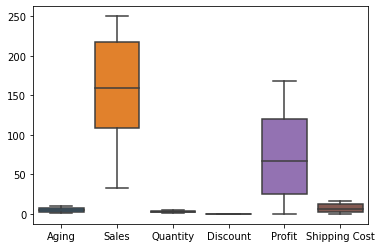

In [33]:
sns.boxplot(data=eco);


In [34]:
 eco['Ship Mode'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7494
Same Day           2701
45788                 1
Name: Ship Mode, dtype: int64

In [35]:
eco=eco[eco ['Ship Mode']!= ('45788') ] 

In [36]:
eco.describe().round(2)

,Aging,Sales,Quantity,Discount,Profit,Shipping Cost
count,51279.00,51279.00,51279.00,51279.00,51279.00,51279.00
mean,5.26,156.43,3.00,0.03,72.72,7.27
std,2.96,65.78,1.41,0.01,49.10,4.91
min,1.00,33.00,1.00,0.01,0.50,0.10
25%,3.00,109.00,2.00,0.02,25.70,2.60
50%,5.00,159.00,3.00,0.03,67.00,6.70
75%,8.00,218.00,4.00,0.04,120.60,12.10
max,10.50,250.00,5.00,0.05,167.50,16.80


 # Correlation 

In [37]:
eco_subset = eco.loc[:, ["Aging","Sales","Profit","Quantity","Shipping Cost"]]

In [38]:
eco_subset_corr = pd.DataFrame(np.corrcoef(eco_subset.T))
eco_subset_corr.columns = ["Aging","Sales","Profit","Quantity","Shipping Cost"]

eco_subset_corr.index = ["Aging","Sales","Profit","Quantity","Shipping Cost"]
eco_subset_corr

,Aging,Sales,Profit,Quantity,Shipping Cost
Aging,1.000000,0.014862,0.015293,-0.002497,0.015207
Sales,0.014862,1.000000,0.921518,-0.000609,0.921268
Profit,0.015293,0.921518,1.000000,-0.176323,0.999982
Quantity,-0.002497,-0.000609,-0.176323,1.000000,-0.176657
Shipping Cost,0.015207,0.921268,0.999982,-0.176657,1.000000


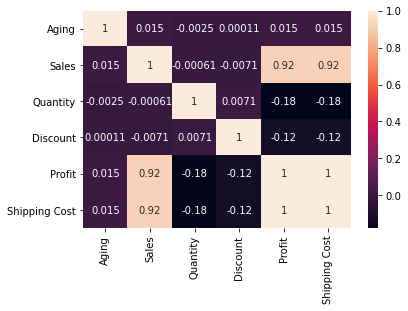

In [39]:
#Correlation between columns of data
corrheatmap=eco.corr()
sns.heatmap(corrheatmap,annot=True)
plt.show()

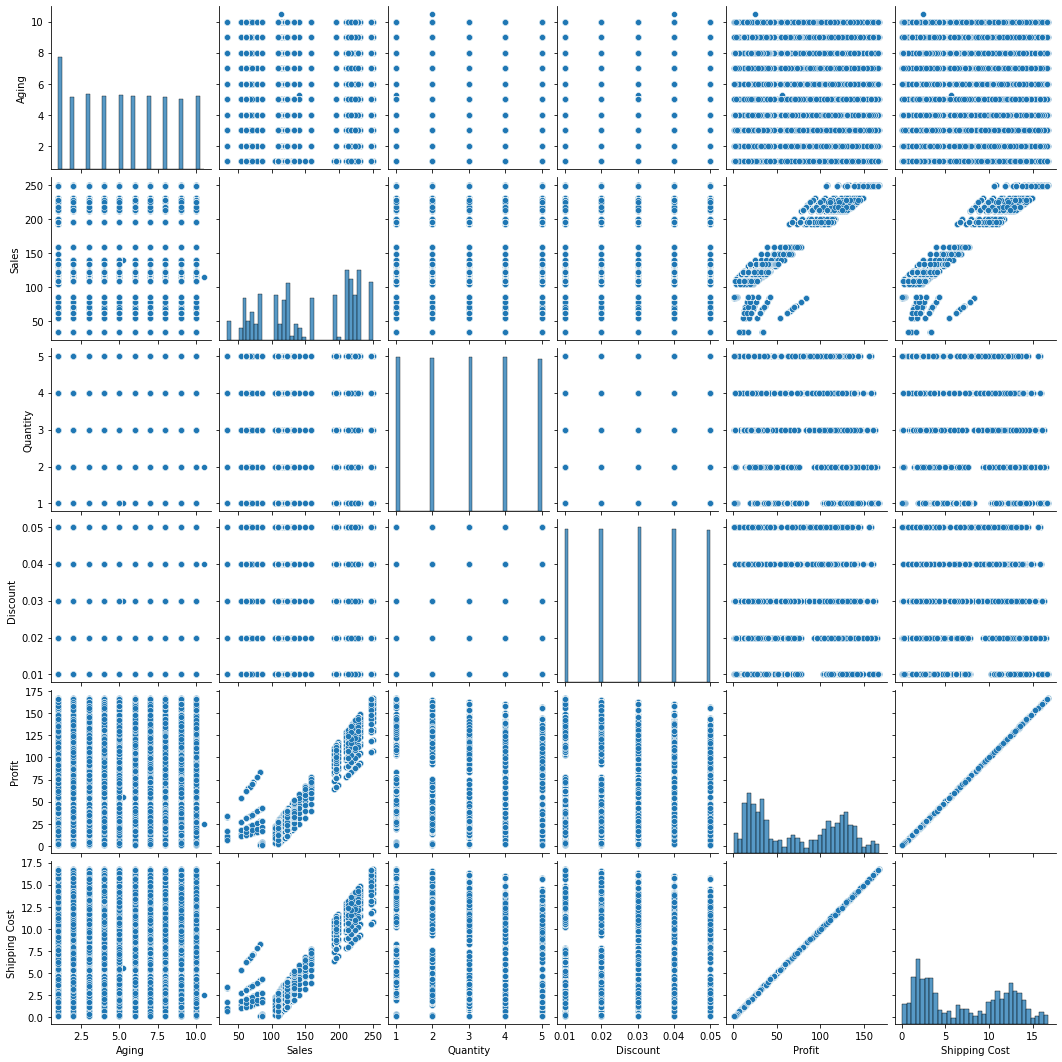

In [40]:
sns.pairplot(eco)

## The relationship between sales and profits through visualization

In [41]:
Sales_Norm = (eco_subset['Sales']-np.mean(eco_subset['Sales']))/np.std(eco_subset['Sales'])
Profit_Norm = (eco_subset['Profit']-np.mean(eco_subset['Profit']))/np.std(eco_subset['Profit'])

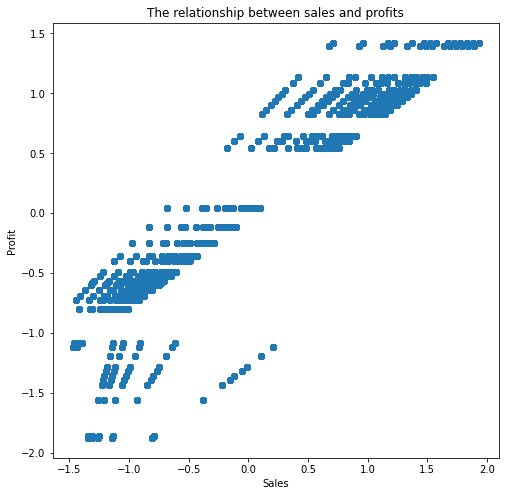

In [42]:
#We note the logical relationship between sales and profits
plt.figure(figsize=[8,8])
plt.title("The relationship between sales and profits")
plt.scatter (x=Profit_Norm, y=Sales_Norm)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()  

## visualization data

## What is the most used ship mode?

In [43]:
 eco['Ship Mode'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7494
Same Day           2701
Name: Ship Mode, dtype: int64

Text(0, 0.5, 'count')

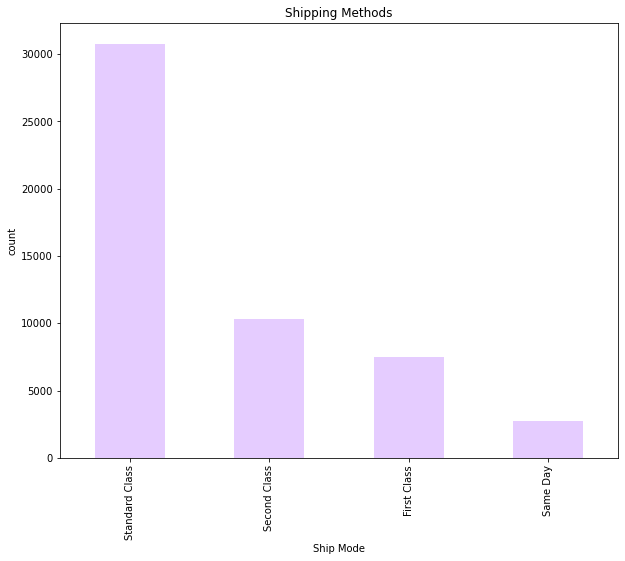

In [53]:

high_demand = eco['Ship Mode'].value_counts()[:10]
high_demand.plot(kind='bar',figsize=(10,8),color='#E5CCFF')
plt.title('Shipping Methods') 
plt.xlabel("Ship Mode")
plt.ylabel("count")


## what is the Top 10 Countries based Sales?

In [45]:
ذ

United States    9993
Australia        2836
France           2826
Mexico           2642
Germany          2065
                 ... 
Burundi             2
South Sudan         2
Chad                2
Eritrea             2
Bahrain             2
Name: Country, Length: 147, dtype: int64

Text(0, 0.5, 'count')

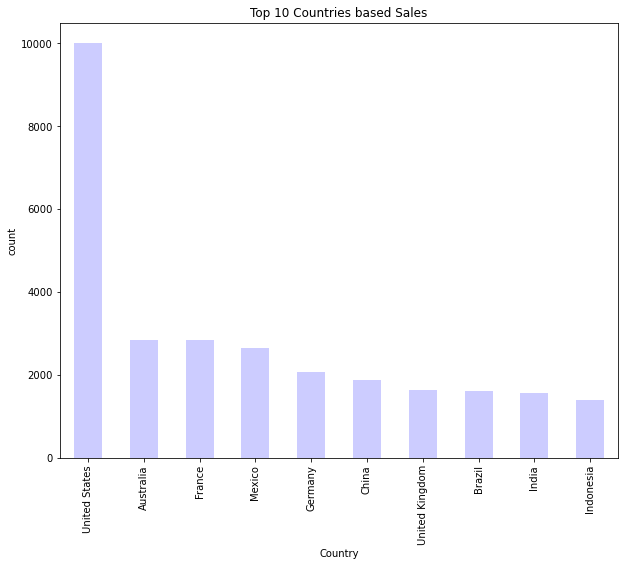

In [73]:
#United States got most of online shoppers followed by Australia and France

top_10 = eco['Country'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8),color='#CCCCFF')
plt.title('Top 10 Countries based Sales') 
plt.xlabel("Country")
plt.ylabel("count") 

## Which Products Category people are showing interests in?

In [47]:
eco['Product'].value_counts()

Sports Wear               2827
Fossil Watch              2796
Suits                     2795
Sneakers                  2795
Formal Shoes              2795
Casula Shoes              2795
Running Shoes             2795
Titak watch               2795
T - Shirts                2794
Shirts                    2794
Jeans                     2794
Dinner Crockery           1053
Sofas                     1029
Beds                      1029
Shoe Rack                 1029
Dinning Tables            1029
Umbrellas                 1029
Curtains                  1028
Towels                    1028
Bed Sheets                1028
Sofa Covers               1027
Tyre                       890
Car Pillow & Neck Rest     828
Car Body Covers            826
Car & Bike Care            826
Car Seat Covers            826
Car Media Players          825
Car Mat                    825
Bike Tyres                 825
Car Speakers               823
Speakers                   261
LED                        224
LCD     

Text(0, 0.5, 'count')

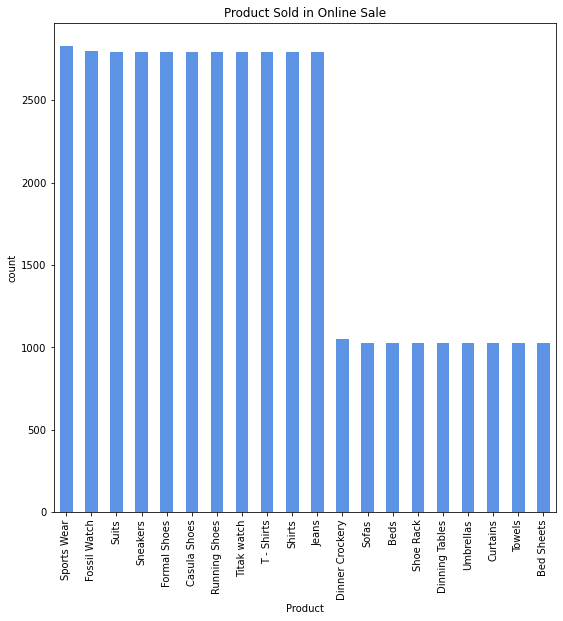

In [76]:
#The best selling products are sports wear
top = eco['Product'].value_counts()[:20]
top.plot(kind='bar',figsize=(9,9),color='#5D93E5')
plt.title('Product Sold in Online Sale')
plt.xlabel("Product")
plt.ylabel("count")

## What is the Top 10 Spending Customer?

<AxesSubplot:title={'center':'Top 10 Spending Customer'}, xlabel='Customer ID', ylabel='Sales'>

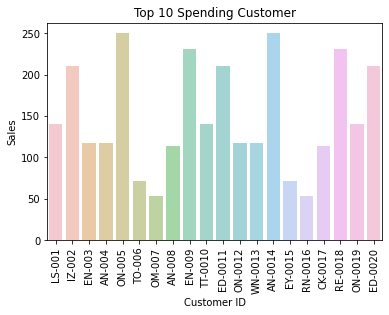

In [66]:

plt.xticks(rotation = 'vertical')
plt.title('Top 10 Spending Customer');
sns.barplot(y = 'Sales', x = 'Customer ID', data = eco.head(20) ,alpha = .5 )


## The Relationship between the product in store and the sales?

<AxesSubplot:title={'center':'Top 10 Spending Customer'}, xlabel='Aging', ylabel='Sales'>

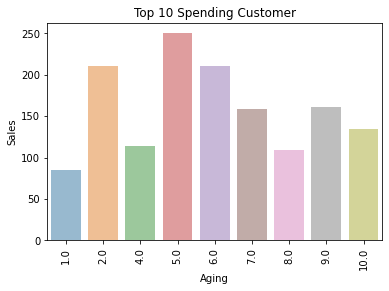

In [50]:

plt.xticks(rotation = 'vertical')
plt.title('Top 10 Spending Customer');
sns.barplot(y = 'Sales', x = 'Aging', data = eco.head(20), alpha = .5 ,ci=None )